In [1]:
import re
import csv

def clean_text(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove square brackets
    text = text.replace('[', '').replace(']', '')

    return text.strip()

def main():
    input_file_path = 'arabicData.txt'
    output_file_path = 'output_phrases.csv'

    with open(input_file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    # Clean the text
    cleaned_text = clean_text(content)

    # Split into phrases
    phrases = re.split(r'[\n]', cleaned_text)

    # Remove empty phrases
    phrases = [phrase.strip() for phrase in phrases if phrase.strip()]

    # Write to CSV file
    with open(output_file_path, 'w', encoding='utf-8', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Phrase'])

        for phrase in phrases:
            csv_writer.writerow([phrase])

    print(f"Phrases extracted and saved to {output_file_path}")

if __name__ == "__main__":
    main()


Phrases extracted and saved to output_phrases.csv


In [2]:
import pandas as pd
df = pd.read_csv("output_phrases.csv")
df

,Phrase
0,تضامنًا مع حق الشعب الفلسطيني
1,لا للإبادة الجماعية في غزة .... لا لقتل المدنيين
2,لا لاستهداف المستشفيات والمدارس .... لا للتضلي...
3,أوقفوا الحرب .... وانشروا السلام العادل والشامل
4,تُونِسأ (رسميًّا: الجُمْهُورِيَّةُ التُّونِسِي...
...,...
4435,عليسة (بالإنجليزية: Dido)، وتعرف أيضاً باسم أل...
4436,عرفت «عليسة» بعدة أسماء بحسب الحضارة التي تكلم...
4437,عِلِّيسَة هي ابنة ملك صور وأخت بيغماليون. وكان...
4438,هاجر الفينيقيون إلى قبرص ومن ثم إلى مصر وبعد ا...


In [3]:
df['Phrase'][4]

'تُونِسأ (رسميًّا: الجُمْهُورِيَّةُ التُّونِسِيَّة)،ب هي دولة عربية في أقصى شمال أفريقيا. وهي جزء من منطقة المغرب العربي، وتحدها الجزائر من الغرب والجنوب الغربي، ليبيا من الجنوب الشرقي والبحر الأبيض المتوسط من الشمال والشرق. تغطي , كم مربع (, ميل مربع)، ويبلغ عدد سكانها  مليون نسمة. تحتوي على الطرف الشرقي لجبال الأطلس والروافد الشمالية للصحراء الكبرى، مع الكثير من أراضيها المتبقية من الأراضي الصالحة للزراعة. يشمل خطها الساحلي الذي يبلغ طوله  كيلومتر ( ميل) الارتباط الأفريقي بين الأجزاء الغربية والشرقية من حوض البحر الأبيض المتوسط. تونس هي موطن لأقصى نقطة في شمال أفريقيا، رأس أنجلة. وعاصمتها وأكبر مدنها هي مدينة تونس،وتعد احدى الدول في جامعة الدول العربية  وتقع على الساحل الشمالي الشرقي، الذي يُطلق على البلاد اسمها.'

In [27]:
import re
import csv
import random

def clean_text(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove square brackets
    text = text.replace('[', '').replace(']', '')

    return text.strip()

def main():
    input_file_path = 'arabicData.txt'
    output_file_path = 'Phrases.csv'

    with open(input_file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    # Clean the text
    cleaned_text = clean_text(content)

    # Split into sentences
    sentences = re.split(r'[\n.!?]', cleaned_text)

    # Remove empty sentences
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

    # Create pairs of consecutive sentences
    consecutive_pairs = list(zip(sentences, sentences[1:]))

    # Create random pairs of sentences
    random_pairs = random.sample(list(zip(sentences, random.sample(sentences, len(sentences)))), min(len(sentences), 10000))

    # Write to CSV file
    with open(output_file_path, 'w', encoding='utf-8', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Sentence 1', 'Sentence 2', 'Human Annotation'])

        # Write consecutive pairs with human annotation 5
        for pair in consecutive_pairs:
            csv_writer.writerow([pair[0], pair[1], 5])

        # Write random pairs with human annotation 1
        for pair in random_pairs:
            csv_writer.writerow([pair[0], pair[1], 1])

    print(f"Pairs extracted and saved to {output_file_path}")

if __name__ == "__main__":
    main()

Pairs extracted and saved to Phrases.csv


In [35]:
import pandas as pd
data = pd.read_csv("Phrases.csv")
data

,Sentence 1,Sentence 2,Human Annotation
0,تضامنًا مع حق الشعب الفلسطيني,لا للإبادة الجماعية في غزة,5
1,لا للإبادة الجماعية في غزة,لا لقتل المدنيين,5
2,لا لقتل المدنيين,لا لاستهداف المستشفيات والمدارس,5
3,لا لاستهداف المستشفيات والمدارس,لا للتضليل والكيل بمكيالين,5
4,لا للتضليل والكيل بمكيالين,أوقفوا الحرب,5
...,...,...,...
24112,كانت تستمع لأغاني ليلى مراد وأسمهان وهي تقف في...,"الإمبراطورية الألمانية ,,",1
24113,وكانت فرنسا واحدة من الأعضاء المؤسسين لمنظمة ح...,فقاد الأرستقراطي جاك أنطوان دي ماري ما أصبح يع...,1
24114,»,لويس السادس عشر، الذي خلف جده، لويس الخامس عشر...,1
24115,بدأت عمليَّات فتح المغرب في عهد الخليفة الراشد...,واكب الفيلسوف الإنجليزي توماس هوبز هذا النقاش ...,1


In [42]:
import re
import csv
import random
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

def clean_text(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove square brackets
    text = text.replace('[', '').replace(']', '')

    return text.strip()

def extract_bert_features(text, model, tokenizer):
    encoded_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        model_output = model(**encoded_input)
    return model_output['last_hidden_state']

def calculate_similarity(sentence_vectors):
    similarity_scores = []
    for i in range(len(sentence_vectors) - 1):
        similarity = cosine_similarity(sentence_vectors[i][:, 0, :], sentence_vectors[i + 1][:, 0, :]).item()
        similarity_scores.append(similarity)
    return similarity_scores

def automatic_annotation(similarity_scores):
    annotations = []

    for score in similarity_scores:
        if score >= 0.8:
            annotations.append(5)
        elif 0.6 <= score < 0.8:
            annotations.append(4)
        elif 0.4 <= score < 0.6:
            annotations.append(3)
        elif 0.2 <= score < 0.4:
            annotations.append(2)
        else:
            annotations.append(1)

    return annotations

def aggregate_scores(similarity_scores, annotation, num_sentences):
    paragraph_scores = sum(similarity_scores) / num_sentences
    between_paragraph_scores = sum(similarity_scores) / (num_sentences - 1)
    overall_score = sum(similarity_scores) / len(similarity_scores)

    return paragraph_scores, between_paragraph_scores, overall_score

def analyze_results(similarity_scores, annotation):
    avg_score_consecutive = sum([score for score, annot in zip(similarity_scores, annotation) if annot == 5]) / annotation.count(5)

    # Check if there are any annotations with value 1 before calculating average
    if 1 in annotation:
        avg_score_random = sum([score for score, annot in zip(similarity_scores, annotation) if annot == 1]) / annotation.count(1)
    else:
        avg_score_random = 0.0  # Set to 0 if no annotations with value 1

    print(f"Average Similarity Score for Consecutive Sentences (Annotation 5): {avg_score_consecutive:.2f}")
    print(f"Average Similarity Score for Random Sentences (Annotation 1): {avg_score_random:.2f}")

def main():
    input_file_path = 'arabicData.txt'
    output_file_path = 'phrases_bert.csv'

    # Load pre-trained BERT model and tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
    model = BertModel.from_pretrained('bert-base-multilingual-cased')

    with open(input_file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    cleaned_text = clean_text(content)
    sentences = re.split(r'[\n.!?]', cleaned_text)
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

    sentence_vectors = [extract_bert_features(sentence, model, tokenizer) for sentence in sentences]

    # Create pairs of consecutive sentences
    consecutive_similarity_scores = calculate_similarity(sentence_vectors)

    # Create random pairs of sentences
    random_pairs = random.sample(list(zip(sentences, random.sample(sentences, len(sentences)))), min(len(sentences), 10000))
    random_pairs = [(pair[0], pair[1], extract_bert_features(pair[0], model, tokenizer), extract_bert_features(pair[1], model, tokenizer)) for pair in random_pairs]
    random_similarity_scores = [cosine_similarity(pair[2][:, 0, :], pair[3][:, 0, :]).item() for pair in random_pairs]

    consecutive_annotation = automatic_annotation(consecutive_similarity_scores)
    random_annotation = automatic_annotation(random_similarity_scores)

    with open(output_file_path, 'w', encoding='utf-8', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Sentence 1', 'Sentence 2', 'Human Annotation', 'Similarity Score', 'Automatic Annotation'])

        for i in range(len(consecutive_similarity_scores)):
            csv_writer.writerow([sentences[i], sentences[i+1], 5, consecutive_similarity_scores[i], consecutive_annotation[i]])

        for i, pair in enumerate(random_pairs):
            csv_writer.writerow([sentences[i], sentences[sentences.index(pair[1])], 1, random_similarity_scores[i], random_annotation[i]])


    print(f"Pairs extracted and saved to {output_file_path}")

    num_sentences = len(sentences)
    paragraph_scores_consecutive, between_paragraph_scores_consecutive, overall_score_consecutive = aggregate_scores(consecutive_similarity_scores, consecutive_annotation, num_sentences)
    paragraph_scores_random, between_paragraph_scores_random, overall_score_random = aggregate_scores(random_similarity_scores, random_annotation, num_sentences)

    print("Results Analysis:")
    print(f"Paragraph-level Similarity (Consecutive Sentences): {paragraph_scores_consecutive:.2f}")
    print(f"Between-Paragraph Similarity (Consecutive Sentences): {between_paragraph_scores_consecutive:.2f}")
    print(f"Overall Similarity (Consecutive Sentences): {overall_score_consecutive:.2f}")

    print(f"\nParagraph-level Similarity (Random Sentences): {paragraph_scores_random:.2f}")
    print(f"Between-Paragraph Similarity (Random Sentences): {between_paragraph_scores_random:.2f}")
    print(f"Overall Similarity (Random Sentences): {overall_score_random:.2f}")

    analyze_results(consecutive_similarity_scores, consecutive_annotation)
    analyze_results(random_similarity_scores, random_annotation)

if __name__ == "__main__":
    main()

Pairs extracted and saved to phrases_bert.csv
Results Analysis:
Paragraph-level Similarity (Consecutive Sentences): 0.75
Between-Paragraph Similarity (Consecutive Sentences): 0.75
Overall Similarity (Consecutive Sentences): 0.75

Paragraph-level Similarity (Random Sentences): 0.50
Between-Paragraph Similarity (Random Sentences): 0.50
Overall Similarity (Random Sentences): 0.71
Average Similarity Score for Consecutive Sentences (Annotation 5): 0.91
Average Similarity Score for Random Sentences (Annotation 1): -0.00
Average Similarity Score for Consecutive Sentences (Annotation 5): 0.88
Average Similarity Score for Random Sentences (Annotation 1): -0.01


In [43]:
d = pd.read_csv("phrases_bert.csv")
d

,Sentence 1,Sentence 2,Human Annotation,Similarity Score,Automatic Annotation
0,تضامنًا مع حق الشعب الفلسطيني,لا للإبادة الجماعية في غزة,5,0.929777,5
1,لا للإبادة الجماعية في غزة,لا لقتل المدنيين,5,0.965297,5
2,لا لقتل المدنيين,لا لاستهداف المستشفيات والمدارس,5,0.961148,5
3,لا لاستهداف المستشفيات والمدارس,لا للتضليل والكيل بمكيالين,5,0.971894,5
4,لا للتضليل والكيل بمكيالين,أوقفوا الحرب,5,0.929879,5
...,...,...,...,...,...
24112,كما ينسب له هذا البيت في وصف أكثر أهل الأرض في...,وتتميز الهضبة السويسرية بكثافة سكانية عالية مع...,1,0.891019,5
24113,اشتهر المتنبي بالحكمة وذهب كثير من أقواله مجرى...,أدى انهيار الاتحاد السوفيتي وانهيار الروابط ال...,1,0.865058,5
24114,ومن حكمه ونظراته في الحياة:,كانت السلطات الطبيَّة قد أخطزت عندما قدَّرت ال...,1,0.876351,5
24115,كذلك يقول:,لذلك، بحلول الوقت الذي شدّد فيه الاحتياطي الفي...,1,0.874041,5


In [44]:
import re
import csv
import torch
import pandas as pd
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

def clean_text(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove square brackets
    text = text.replace('[', '').replace(']', '')

    return text.strip()

def extract_word2vec_features(text, word2vec_model):
    words = text.split()
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return torch.tensor(word_vectors)

def calculate_similarity(sentence_vectors):
    similarity_scores = []
    for i in range(0, len(sentence_vectors) - 1, 2):
        similarity = cosine_similarity(sentence_vectors[i].mean(0).reshape(1, -1), sentence_vectors[i + 1].mean(0).reshape(1, -1)).item()
        similarity_scores.append(similarity)
    return similarity_scores

def automatic_annotation(similarity_scores):
    annotations = []

    for score in similarity_scores:
        if score >= 0.8:
            annotations.append(5)
        elif 0.6 <= score < 0.8:
            annotations.append(4)
        elif 0.4 <= score < 0.6:
            annotations.append(3)
        elif 0.2 <= score < 0.4:
            annotations.append(2)
        else:
            annotations.append(1)

    return annotations

def aggregate_scores(similarity_scores, annotation, num_sentences):
    paragraph_scores = sum(similarity_scores) / num_sentences
    between_paragraph_scores = sum(similarity_scores) / (num_sentences - 1)
    overall_score = sum(similarity_scores) / len(similarity_scores)

    return paragraph_scores, between_paragraph_scores, overall_score

def analyze_results(similarity_scores, annotation):
    avg_score_consecutive = sum([score for score, annot in zip(similarity_scores, annotation) if annot == 5]) / annotation.count(5)

    # Check if there are any annotations with value 1 before calculating average
    if 1 in annotation:
        avg_score_random = sum([score for score, annot in zip(similarity_scores, annotation) if annot == 1]) / annotation.count(1)
    else:
        avg_score_random = 0.0  # Set to 0 if no annotations with value 1

    print(f"Average Similarity Score for Consecutive Sentences (Annotation 5): {avg_score_consecutive:.2f}")
    print(f"Average Similarity Score for Random Sentences (Annotation 1): {avg_score_random:.2f}")

def main():
    input_file_path = 'phrases_bert.csv'
    output_file_path = 'phrases_bert_w2v.csv'

    # Load your CSV data
    data = pd.read_csv(input_file_path)
    sentences = data["Sentence 1"].tolist() + data["Sentence 2"].tolist()

    # Train Word2Vec model
    sentences_tokenized = [sentence.split() for sentence in sentences]
    word2vec_model = Word2Vec(sentences_tokenized, vector_size=100, window=5, min_count=1, workers=4)

    sentence_vectors = [extract_word2vec_features(sentence, word2vec_model) for sentence in sentences]

    similarity_scores = calculate_similarity(sentence_vectors)
    annotation = automatic_annotation(similarity_scores)

    # Add Word2Vec annotation to the DataFrame
    data['word2vec_annotation'] = annotation

    # Save the DataFrame to a new CSV file
    data.to_csv(output_file_path, index=False, encoding='utf-8')

    print(f"Pairs extracted and saved to {output_file_path}")

    num_sentences = len(sentences)
    paragraph_scores, between_paragraph_scores, overall_score = aggregate_scores(similarity_scores, annotation, num_sentences)

    print("Results Analysis:")
    print(f"Paragraph-level Similarity: {paragraph_scores:.2f}")
    print(f"Between-Paragraph Similarity: {between_paragraph_scores:.2f}")
    print(f"Overall Similarity: {overall_score:.2f}")

    analyze_results(similarity_scores, annotation)

if __name__ == "__main__":
    main()

Pairs extracted and saved to phrases_bert_w2v.csv
Results Analysis:
Paragraph-level Similarity: 0.40
Between-Paragraph Similarity: 0.40
Overall Similarity: 0.80
Average Similarity Score for Consecutive Sentences (Annotation 5): 0.88
Average Similarity Score for Random Sentences (Annotation 1): -0.01


In [45]:
d2= pd.read_csv("phrases_bert_w2v.csv")
d2

,Sentence 1,Sentence 2,Human Annotation,Similarity Score,Automatic Annotation,word2vec_annotation
0,تضامنًا مع حق الشعب الفلسطيني,لا للإبادة الجماعية في غزة,5,0.929777,5,3
1,لا للإبادة الجماعية في غزة,لا لقتل المدنيين,5,0.965297,5,5
2,لا لقتل المدنيين,لا لاستهداف المستشفيات والمدارس,5,0.961148,5,2
3,لا لاستهداف المستشفيات والمدارس,لا للتضليل والكيل بمكيالين,5,0.971894,5,3
4,لا للتضليل والكيل بمكيالين,أوقفوا الحرب,5,0.929879,5,4
...,...,...,...,...,...,...
24112,كما ينسب له هذا البيت في وصف أكثر أهل الأرض في...,وتتميز الهضبة السويسرية بكثافة سكانية عالية مع...,1,0.891019,5,3
24113,اشتهر المتنبي بالحكمة وذهب كثير من أقواله مجرى...,أدى انهيار الاتحاد السوفيتي وانهيار الروابط ال...,1,0.865058,5,4
24114,ومن حكمه ونظراته في الحياة:,كانت السلطات الطبيَّة قد أخطزت عندما قدَّرت ال...,1,0.876351,5,4
24115,كذلك يقول:,لذلك، بحلول الوقت الذي شدّد فيه الاحتياطي الفي...,1,0.874041,5,4


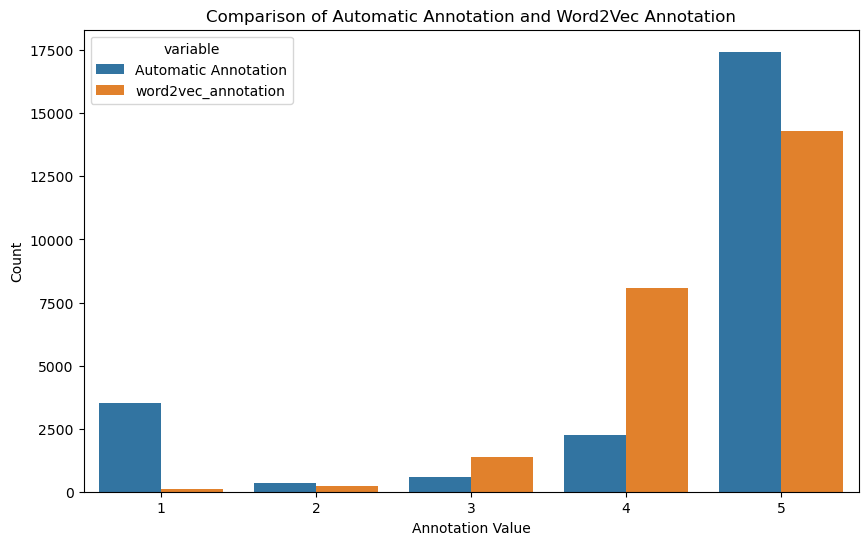

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the relevant columns
auto_annotation_counts = d2['Automatic Annotation'].value_counts().sort_index()
word2vec_annotation_counts = d2['word2vec_annotation'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='value', hue='variable', data=pd.melt(d2[['Automatic Annotation', 'word2vec_annotation']], value_name='value'))
plt.title('Comparison of Automatic Annotation and Word2Vec Annotation')
plt.xlabel('Annotation Value')
plt.ylabel('Count')
plt.show()


In [47]:

def aggregate_paragraph_scores(similarity_scores, sentence_boundaries):
    paragraph_scores = []
    start_index = 0
    for end_index in sentence_boundaries:
        paragraph_score = sum(similarity_scores[start_index:end_index]) / (end_index - start_index)
        paragraph_scores.append(paragraph_score)
        start_index = end_index
    return paragraph_scores

def aggregate_between_paragraph_scores(similarity_scores, sentence_boundaries):
    between_paragraph_scores = []
    for i in range(len(sentence_boundaries) - 1):
        # Utilisez l'indice de la dernière phrase du paragraphe actuel - 1
        index = sentence_boundaries[i] - 1
        if index < len(similarity_scores):
            score = similarity_scores[index]
            between_paragraph_scores.append(score)
        else:
            print(f"Index {index} hors de la plage pour similarity_scores")
    return sum(between_paragraph_scores) / len(between_paragraph_scores) if between_paragraph_scores else 0

def aggregate_overall_score(similarity_scores):
    overall_score = sum(similarity_scores) / len(similarity_scores)
    return overall_score

consecutive_similarity_scores = d2['Similarity Score'].tolist()  # Remplacez ceci par vos scores de similarité calculés

sentence_boundaries = [4, 10, 15,20]
paragraph_scores = aggregate_paragraph_scores(consecutive_similarity_scores, sentence_boundaries)
between_paragraph_score = aggregate_between_paragraph_scores(consecutive_similarity_scores, sentence_boundaries)
overall_text_score = aggregate_overall_score(consecutive_similarity_scores)

print("Agrégation des Scores :")
print("Scores de Cohérence au Niveau du Paragraphe :", paragraph_scores)
print("Score de Cohérence Entre les Paragraphes :", between_paragraph_score)
print("Score de Cohérence pour l'Ensemble du Texte :", overall_text_score)



Agrégation des Scores :
Scores de Cohérence au Niveau du Paragraphe : [0.9570288211107254, 0.8668116728464762, 0.8916974425315857, 0.8833417773246766]
Score de Cohérence Entre les Paragraphes : 0.9086741209030151
Score de Cohérence pour l'Ensemble du Texte : 0.7323795580241441


In [48]:
import re

# Fonction pour extraire les phrases d'un texte
def extraire_phrases(texte):
    phrases = re.split(r'\.\s*', texte)
    return [phrase for phrase in phrases if phrase]

# Fonction pour analyser la cohérence
def analyse_coherence(paragraph_scores, between_paragraph_scores, overall_score, sentences, sentence_boundaries):
    print("Analyse des Résultats de Cohérence :")

    # Cohérence au niveau des paragraphes
    for i, score in enumerate(paragraph_scores):
        print(f"Cohérence du paragraphe {i + 1} : {score:.2f}")

    # Cohérence entre les paragraphes
    print(f"Cohérence entre les paragraphes : {between_paragraph_scores:.2f}")

    # Cohérence globale du texte
    print(f"Cohérence globale du texte : {overall_score:.2f}")

    # Zones de cohérence perçue différemment
    for i in range(len(sentence_boundaries) - 1):
        start = sentence_boundaries[i]
        end = sentence_boundaries[i + 1] if i < len(sentence_boundaries) - 1 else len(sentences)
        paragraph = " ".join(sentences[start:end])
        print(f"Paragraphe {i + 1}: {paragraph}")
        print(f"Score de cohérence: {paragraph_scores[i]:.2f}\n")

# Exemple d'utilisation
for i in range(len(df)):
   texte_complet = df['Phrase'][i]
   sentences = extraire_phrases(texte_complet)

# Scores de similarité et frontières des paragraphes (à remplacer par vos propres données)
similarity_scores = d2['Similarity Score'].tolist()
sentence_boundaries = [2, 4]

# Calcul des scores de cohérence
paragraph_scores = [sum(similarity_scores[:sentence_boundaries[0]]) / sentence_boundaries[0],
                    sum(similarity_scores[sentence_boundaries[0]:sentence_boundaries[1]]) / (sentence_boundaries[1] - sentence_boundaries[0])]
between_paragraph_scores = sum(similarity_scores) / len(similarity_scores)
overall_score = sum(similarity_scores) / len(similarity_scores)

# Analyse des résultats
analyse_coherence(paragraph_scores, between_paragraph_scores, overall_score, sentences, sentence_boundaries)


Analyse des Résultats de Cohérence :
Cohérence du paragraphe 1 : 0.95
Cohérence du paragraphe 2 : 0.97
Cohérence entre les paragraphes : 0.73
Cohérence globale du texte : 0.73
Paragraphe 1: 
Score de cohérence: 0.95

